In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/y2209/Git/homework2/github_bot_raw_data.csv')
before_dedup = len(df)
df_dedup = df.drop_duplicates()
after_dedup = len(df)

print("去重前的数据量:",before_dedup)
print("去重后的数据量:",after_dedup)

print("去重后的数据:")
print(df_dedup)

去重前的数据量: 20358
去重后的数据量: 20358
去重后的数据:
       actor_id  label      login        id               node_id  \
0       1081405  Human    dlazesz   1081405  MDQ6VXNlcjEwODE0MDU=   
1      13100598  Human  sarkiroka  13100598  MDQ6VXNlcjEzMTAwNTk4   
2         22494  Human  ZoomQuiet     22494      MDQ6VXNlcjIyNDk0   
3       7648032    Bot   AlCutter   7648032  MDQ6VXNlcjc2NDgwMzI=   
4       2163522  Human    meetyan   2163522  MDQ6VXNlcjIxNjM1MjI=   
...         ...    ...        ...       ...                   ...   
20344   8052756    Bot    tbreeds   8052756  MDQ6VXNlcjgwNTI3NTY=   
20345  34321341  Human     ssisil  34321341  MDQ6VXNlcjM0MzIxMzQx   
20346  15847407  Human   dbfannin  15847407  MDQ6VXNlcjE1ODQ3NDA3   
20347  94929125  Human    jambayk  94929125          U_kgDOBaiA5Q   
20348  18622487    Bot     G3rrus  18622487  MDQ6VXNlcjE4NjIyNDg3   

                                              avatar_url  gravatar_id  \
0      https://avatars.githubusercontent.com/u/108140...    

In [2]:
df = df.drop(columns=['gravatar_id'])
missing_values = df.isnull().sum()

print("各列缺失值数量")
print(missing_values)



各列缺失值数量
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2654
company                 9229
blog                   11601
location                7287
email                  12079
hireable               16956
bio                    11262
twitter_username       15297
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str)
        if df[col].str.lower().isin(['yes','no']).any():
            df[col] = df[col].str.lower().map({'yes': True, 'no': False})
        elif df[col].isin([1, 0]).any():
            df[col] = df[col].map({1: True, 0: False})
df = df.fillna('')
missing_values = df.isnull().sum()

print("各列缺失值数量")
print(missing_values)


各列缺失值数量
actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64


In [7]:
df['created_at'] = pd.to_datetime(df['created_at'],errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'],errors='coerce')

df['created_at_timestamp'] = df['created_at'].astype(int) /10**9
df['updated_at_timestamp'] = df['updated_at'].astype(int) /10**9

print(df[['created_at','created_at_timestamp','updated_at', 'updated_at_timestamp']])


                     created_at  created_at_timestamp  \
0     2011-09-26 17:27:03+00:00          1.317058e+09   
1     2015-06-29 10:12:46+00:00          1.435573e+09   
2     2008-08-29 16:20:03+00:00          1.220027e+09   
3     2014-05-20 18:43:09+00:00          1.400611e+09   
4     2012-08-16 14:19:13+00:00          1.345127e+09   
...                         ...                   ...   
20353 2014-07-02 23:27:34+00:00          1.404344e+09   
20354 2017-12-06 21:56:31+00:00          1.512597e+09   
20355 2015-11-14 14:44:05+00:00          1.447512e+09   
20356 2021-11-23 18:55:29+00:00          1.637694e+09   
20357 2016-04-22 22:11:59+00:00          1.461363e+09   

                     updated_at  updated_at_timestamp  
0     2023-10-13 11:21:10+00:00          1.697196e+09  
1     2023-10-07 06:26:14+00:00          1.696660e+09  
2     2023-10-02 02:11:21+00:00          1.696213e+09  
3     2023-10-12 12:54:59+00:00          1.697115e+09  
4     2023-10-06 11:58:41+00:00    

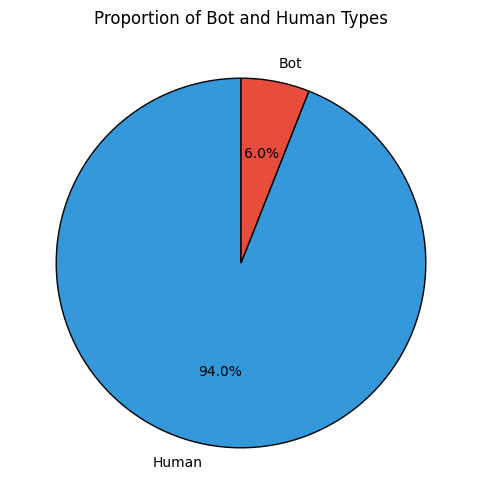

In [11]:
import matplotlib.pyplot as plt

type_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#3498db', '#e74c3c'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Bot and Human Types')
plt.ylabel('')  
plt.show()

选择饼图可以更加清晰的看出bot和human的比例，可以看出在github的用户大部分是人类，少部分是机器人。 人类用户和机器人用户的共存体现了GitHub社区的多样性，这种多样性有助于推动技术创新和社区发展。

C:\Users\y2209\AppData\Local\Temp\ipykernel_4484\361493509.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_df['created_at'] = pd.to_datetime(bot_df['created_at'])
C:\Users\y2209\AppData\Local\Temp\ipykernel_4484\361493509.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_df['year'] = bot_df['created_at'].dt.year
C:\Users\y2209\AppData\Local\Temp\ipykernel_4484\361493509.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

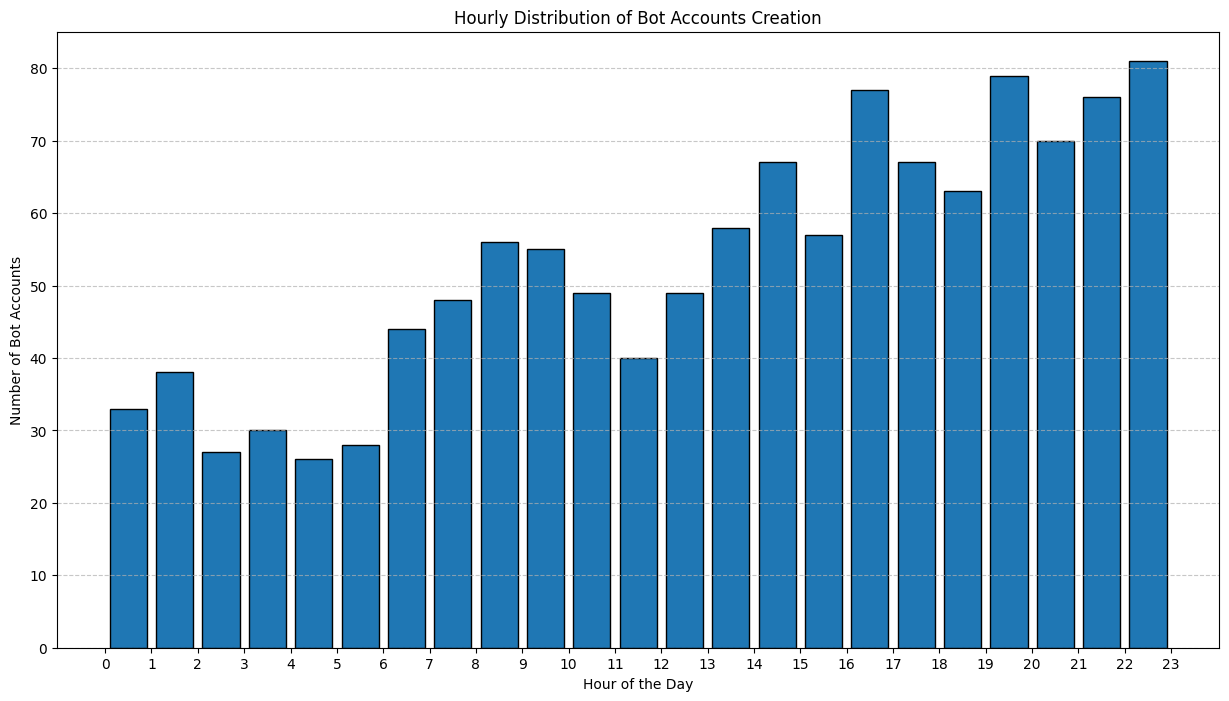

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('github_bot_raw_data.csv')

bot_df = df[df['label'] == 'Bot']

bot_df['created_at'] = pd.to_datetime(bot_df['created_at'])

bot_df['year'] = bot_df['created_at'].dt.year
bot_df['hour'] = bot_df['created_at'].dt.hour

plt.figure(figsize=(15, 8))
plt.hist(bot_df['hour'].astype(int), bins=range(0, 24), edgecolor='black', rwidth=0.8)
plt.title('Hourly Distribution of Bot Accounts Creation')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bot Accounts')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

选择直方图，可以清楚的看出24小时的变化，可见机器人在17点到23点较为活跃

C:\Users\y2209\AppData\Local\Temp\ipykernel_4484\1076079873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_df['created_at'] = pd.to_datetime(human_df['created_at'])
C:\Users\y2209\AppData\Local\Temp\ipykernel_4484\1076079873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_df['year'] = human_df['created_at'].dt.year
C:\Users\y2209\AppData\Local\Temp\ipykernel_4484\1076079873.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

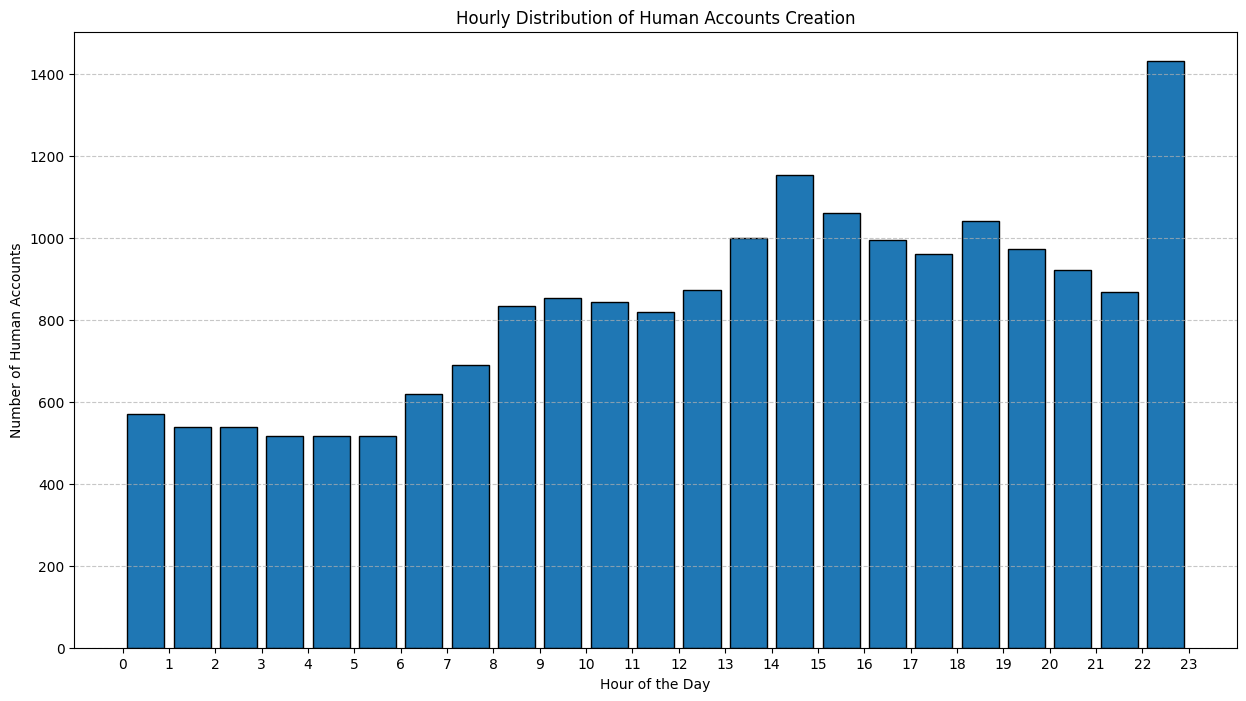

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('github_bot_raw_data.csv')

human_df = df[df['label'] == 'Human']

human_df['created_at'] = pd.to_datetime(human_df['created_at'])

human_df['year'] = human_df['created_at'].dt.year
human_df['hour'] = human_df['created_at'].dt.hour

plt.figure(figsize=(15, 8))
plt.hist(human_df['hour'].astype(int), bins=range(0, 24), edgecolor='black', rwidth=0.8)
plt.title('Hourly Distribution of Human Accounts Creation')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Human Accounts')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

选择直方图，理由同上。由图可知，人类用户在22点到23点使用github的活跃度最高

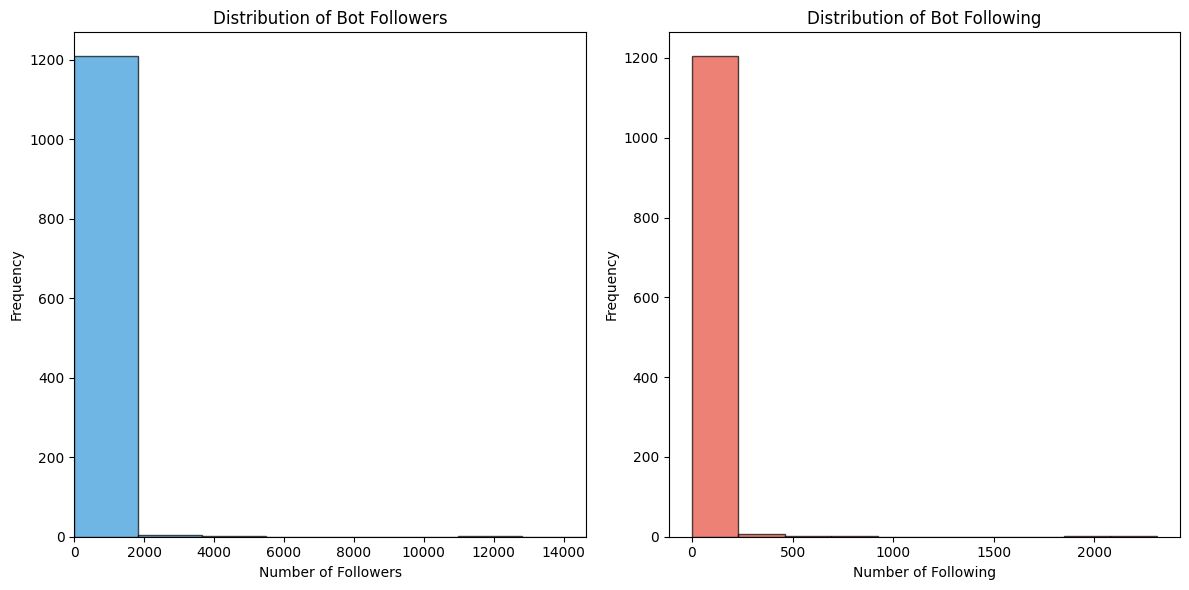

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('github_bot_raw_data.csv')

bot_df = df[df['label'] == 'Bot']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(bot_df['followers'], bins=10, color='#3498db', edgecolor='black', alpha=0.7)
plt.title('Distribution of Bot Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.xlim(0, bot_df['followers'].max() * 0.8)

plt.subplot(1, 2, 2)
plt.hist(bot_df['following'], bins=10, color='#e74c3c', edgecolor='black', alpha=0.7)
plt.title('Distribution of Bot Following')
plt.xlabel('Number of Following')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

选择直方图，由图可见机器人的follower和following的数量比较少，因为机器人的任务主要是维护和协作，不能独立做出好的项目。

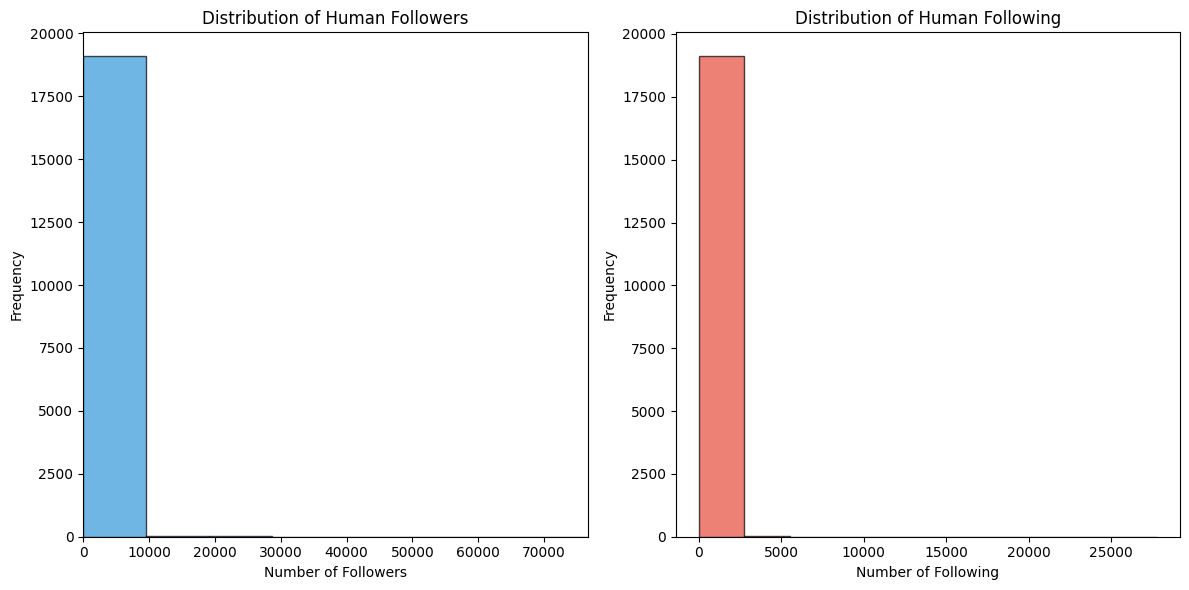

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('github_bot_raw_data.csv')

bot_df = df[df['label'] == 'Human']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(bot_df['followers'], bins=10, color='#3498db', edgecolor='black', alpha=0.7)
plt.title('Distribution of Human Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.xlim(0, bot_df['followers'].max() * 0.8)

plt.subplot(1, 2, 2)
plt.hist(bot_df['following'], bins=10, color='#e74c3c', edgecolor='black', alpha=0.7)
plt.title('Distribution of Human Following')
plt.xlabel('Number of Following')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

依旧是直方图，由图可见，人类用户的粉丝和关注度比机器人高了很多，主要是因为人类用户能提供更新颖的思路和更好的项目。